# Calculate Basin Average Depth Near Peak SWE  
For use in the site summary table

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import show
from rasterio.merge import merge
from pathlib import Path
from rasterstats import zonal_stats

In [2]:
%matplotlib inline

In [4]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_tuolumne/notebooks


## Tuolumne Snow Depth

In [9]:
aso = rio.open('../../data/lidar/tuolumne/snow_on/raw/ASO_3M_SD_USCATE_20190324.tif')

In [10]:
aso.crs

CRS.from_epsg(32611)

In [7]:
outline = gpd.read_file('../data/UpperTuolRiverBasinOutline.geojson')

In [8]:
outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
outline = outline.to_crs('epsg:32611')

In [31]:
mean_sd_2019 = zonal_stats(outline,'../../data/lidar/tuolumne/snow_on/raw/ASO_3M_SD_USCATE_20190324.tif',
            stats="mean min max median percentile_25 percentile_75 std")

In [32]:
mean_sd_2019

[{'min': 0.0,
  'max': 24.925031661987305,
  'mean': 2.7457223038256706,
  'std': 1.5775688919995081,
  'median': 2.823103189468384,
  'percentile_25': 1.7708569765090942,
  'percentile_75': 3.651228189468384},
 {'min': 0.0,
  'max': 24.925031661987305,
  'mean': 2.7457223038256706,
  'std': 1.5775688919995081,
  'median': 2.823103189468384,
  'percentile_25': 1.7708569765090942,
  'percentile_75': 3.651228189468384}]

In [30]:
mean_sd_2020

[{'min': 0.0,
  'max': 24.997648239135742,
  'mean': 0.9712311388732052,
  'std': 0.8906892483920672,
  'median': 0.9278247952461243,
  'percentile_25': 0.12550637125968933,
  'percentile_75': 1.4770689010620117},
 {'min': 0.0,
  'max': 24.997648239135742,
  'mean': 0.9712311388732052,
  'std': 0.8906892483920672,
  'median': 0.9278247952461243,
  'percentile_25': 0.12550637125968933,
  'percentile_75': 1.4770689010620117}]

In [36]:
mean_sd_2021

[{'min': 0.0,
  'max': 7.849906921386719,
  'mean': 0.9667388331201703,
  'std': 0.5253193560138081,
  'median': 1.046650767326355,
  'percentile_25': 0.6105408668518066,
  'percentile_75': 1.3310670256614685},
 {'min': 0.0,
  'max': 7.849906921386719,
  'mean': 0.9667388331201703,
  'std': 0.5253193560138081,
  'median': 1.046650767326355,
  'percentile_25': 0.6105408668518066,
  'percentile_75': 1.3310670256614685}]

In [38]:
mean_sd_2022

[{'min': 0.0,
  'max': 197.1892852783203,
  'mean': 0.967251519388307,
  'std': 0.7145717021040515,
  'median': 0.9796717166900635,
  'percentile_25': 0.4665178656578064,
  'percentile_75': 1.3407869338989258},
 {'min': 0.0,
  'max': 197.1892852783203,
  'mean': 0.967251519388307,
  'std': 0.7145717021040515,
  'median': 0.9796717166900635,
  'percentile_25': 0.4665178656578064,
  'percentile_75': 1.3407869338989258}]

In [45]:
mean_sd_2020 = zonal_stats(outline,'../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_snowdepth_3m_20200413.tif',
            stats="mean min max median percentile_25 percentile_75 std")

/Users/Hannah/opt/miniconda3/envs/datum_reproj3/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [35]:
mean_sd_2021 = zonal_stats(outline,'../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_Mosaic_snowdepth_50m_20210225.tif',
            stats="mean min max median percentile_25 percentile_75 std")

In [37]:
mean_sd_2022 = zonal_stats(outline,'../../data/lidar/tuolumne/snow_on/raw/ASO_Tuolumne_Mosaic_snowdepth_3m_20220204.tif',
            stats="mean min max median percentile_25 percentile_75 std")

In [25]:
mean_sd_2022[0]['mean']

0.967251519388307

In [28]:
(mean_sd_2022[0]['mean'] + mean_sd_2021[0]['mean'] + mean_sd_2020[0]['mean'] + mean_sd_2019[0]['mean']) / 4

1.4127359488018383

## Grand Mesa Snow Depth

In [39]:
gm_outline = gpd.read_file('../../data/site_outlines/gm_outline.geojson')

In [41]:
gm_outline

,date,fn,doy,decyear,dowy,platform,acqdate,geometry
0,2018-01-01T00:00:00,../../data/lidar/grandmesa/ASO_3M_PCDTM_USCOGM...,1,2018.0,93,WaDNR,2018-01-01T00:00:00,"POLYGON ((246393.000 4334322.000, 246393.000 4..."


<AxesSubplot:>

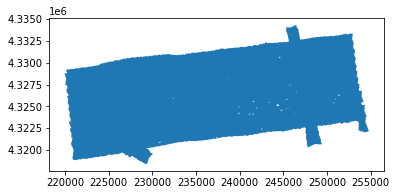

In [47]:
gm_outline.plot()

<AxesSubplot:>

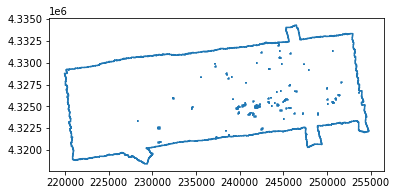

In [46]:
gm_outline.boundary.plot()

In [43]:
mean_sd_2017_gm = zonal_stats(gm_outline,'../../data/lidar/grandmesa/ASO_3M_SD_USCOGM_20170225.tif',
            stats="mean min max median percentile_25 percentile_75 std")

In [44]:
mean_sd_2017_gm

[{'min': -37.366607666015625,
  'max': 29.180513381958008,
  'mean': 1.1834105751835948,
  'std': 0.6053369405409128,
  'median': 1.2764607667922974,
  'percentile_25': 0.9004842042922974,
  'percentile_75': 1.5821248292922974}]

In [48]:
metrics_gm_snowoff = mean_sd_2017_gm = zonal_stats(gm_outline,'../../data/lidar/grandmesa/ASO_3M_PCDTM_USCOGM_20160926_20160926.tif',
            stats="mean min max median percentile_25 percentile_75 std")

In [49]:
metrics_gm_snowoff

[{'min': 2087.152099609375,
  'max': 3396.672119140625,
  'mean': 3022.0535852964886,
  'std': 191.20802312344415,
  'median': 3054.652099609375,
  'percentile_25': 2983.904052734375,
  'percentile_75': 3131.222900390625}]

In [53]:
gm_outline.area / 1e6

0    349.417755
dtype: float64

## Methow Snow Depth

In [60]:
cso = gpd.read_file('../../data/cso/cso-data_092022.geojson')

In [61]:
methow_outline = gpd.read_file('../../data/site_outlines/methow_outline.geojson')

In [62]:
cso['depth_m'] = cso['depth']/100

In [55]:
cso['timestamp'].dtype

dtype('O')

In [63]:
cso['time'] = pd.to_datetime(cso['timestamp'])

In [17]:
cso.head(2)

,id,author,depth,source,timestamp,elevation,_ms,geometry
0,gz86+3JP,David Hill,65.000000,MountainHub,2020-12-28T20:32:46.319000+00:00,830.746399,1609187566319,POINT (-120.21671 48.57078)
1,Jo5GG2Sw,Bob Sutherland,49.999998,MountainHub,2020-01-23T20:07:28.351999+00:00,679.372925,1579810048352,POINT (-120.15874 48.62850)


In [19]:
methow_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

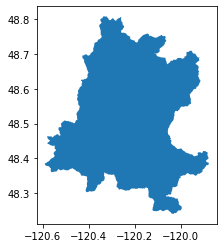

In [23]:
methow_outline[3:].plot()

<AxesSubplot:>

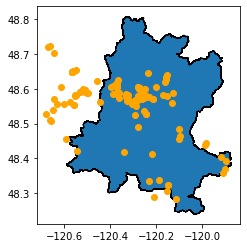

In [34]:
fig, ax = plt.subplots()
methow_outline[3:].plot(facecolor=None, edgecolor='k', ax=ax)
cso.plot(ax=ax, c='orange')

In [20]:
cso.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
methow_outline = methow_outline[3:]

In [65]:
cso_methow = gpd.clip(cso, methow_outline)

<AxesSubplot:>

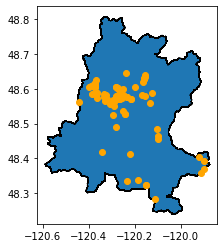

In [40]:
fig, ax = plt.subplots()
methow_outline.plot(facecolor=None, edgecolor='k', ax=ax)
cso_methow.plot(ax=ax, c='orange')

In [66]:
cso = cso.set_index('time')
cso_methow = cso_methow.set_index('time')

<AxesSubplot:xlabel='time'>

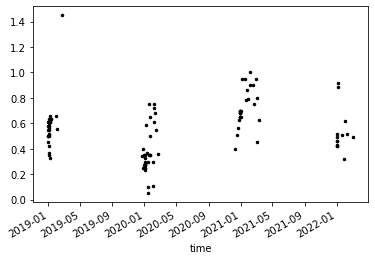

In [43]:
fig, ax = plt.subplots()
cso_methow['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

In [73]:
cso_mean = cso_methow['depth_m'].mean()
cso_mean

0.541255759946891

In [74]:
cso_median = cso_methow['depth_m'].median()
cso_median

0.549999989641229

In [46]:
cso_methow.head(2)

,id,author,depth,source,timestamp,elevation,_ms,geometry,depth_m
time,,,,,,,,,
2020-12-28 20:32:46.319000+00:00,gz86+3JP,David Hill,65.000000,MountainHub,2020-12-28T20:32:46.319000+00:00,830.746399,1609187566319,POINT (-120.21671 48.57078),0.65
2020-01-23 20:07:28.351999+00:00,Jo5GG2Sw,Bob Sutherland,49.999998,MountainHub,2020-01-23T20:07:28.351999+00:00,679.372925,1579810048352,POINT (-120.15874 48.62850),0.50


In [15]:
cso.index.month

Int64Index([ 1,  2,  2,  1,  3,  2,  1,  2,  2,  3,
            ...
             2,  2, 12,  3,  1,  2, 12, 12,  2,  1],
           dtype='int64', name='time', length=139)

In [69]:
cso_spring = cso[cso.index.month > 1]
cso_spring = cso_spring[cso_spring.index.month <5]

cso_methow_spring = cso_methow[cso_methow.index.month > 1]
cso_methow_spring = cso_methow_spring[cso_methow_spring.index.month <5]

<AxesSubplot:xlabel='time'>

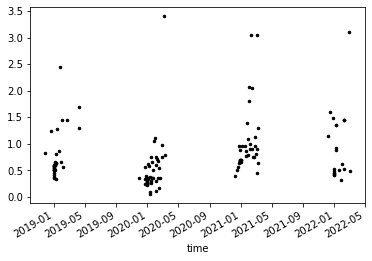

In [75]:
fig, ax = plt.subplots()
cso['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

<AxesSubplot:xlabel='time'>

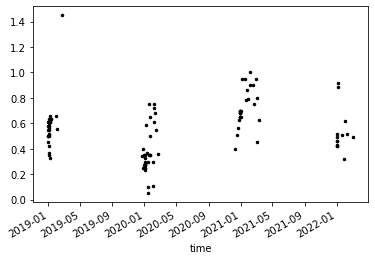

In [72]:
fig, ax = plt.subplots()
cso_methow['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

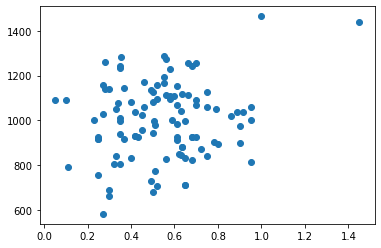

In [77]:
fig, ax = plt.subplots()
plt.scatter(cso_methow['depth_m'], cso_methow['elevation'])

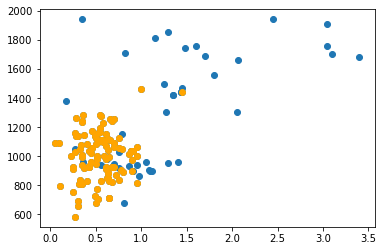

In [80]:
fig, ax = plt.subplots()
plt.scatter(cso['depth_m'], cso['elevation'])
plt.scatter(cso_methow['depth_m'], cso_methow['elevation'], c='orange')

<AxesSubplot:xlabel='time'>

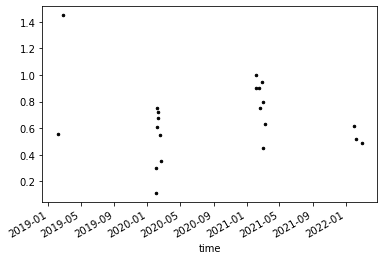

In [70]:
fig, ax = plt.subplots()
cso_methow_spring['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

<AxesSubplot:xlabel='time'>

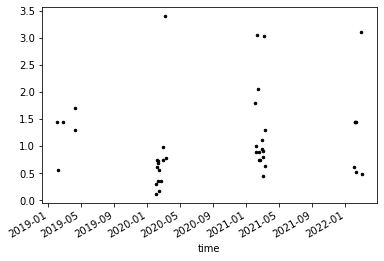

In [71]:
fig, ax = plt.subplots()
cso_spring['depth_m'].plot(ax=ax, linestyle='none', marker='.', color='k', markersize=5)

In [68]:
cso_spring_mean = cso_spring['depth_m'].mean()
cso_spring_mean

1.1055809337595626

In [81]:
cso_methow_spring_mean = cso_methow_spring['depth_m'].mean()
cso_methow_spring_mean

0.6711618847389014

In [89]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 mean: ', cso_methow_2019['depth_m'].mean())
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 mean: ', cso_methow_2020['depth_m'].mean())
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 mean: ', cso_methow_2021['depth_m'].mean())
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 mean: ', cso_methow_2022['depth_m'].mean())

2019 mean:  0.5282714237791112
2020 mean:  0.46394284916077405
2021 mean:  0.704999979828648
2022 mean:  0.5904249884170105


In [90]:
cso_methow_2019 = cso_methow[cso_methow['depth_m'].index.year == 2019]
print('2019 std: ', cso_methow_2019['depth_m'].std())
cso_methow_2020 = cso_methow[cso_methow['depth_m'].index.year == 2020]
print('2020 std: ', cso_methow_2020['depth_m'].std())
cso_methow_2021 = cso_methow[cso_methow['depth_m'].index.year == 2021]
print('2021 std: ', cso_methow_2021['depth_m'].std())
cso_methow_2022 = cso_methow[cso_methow['depth_m'].index.year == 2022]
print('2022 std: ', cso_methow_2022['depth_m'].std())

2019 std:  0.22490669810494524
2020 std:  0.2048763072356499
2021 std:  0.2106755903674547
2022 std:  0.2092964164917612
